<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
df.shape
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [22]:
# your code goes here
import seaborn as sns
!pip install seaborn==0.11.0
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


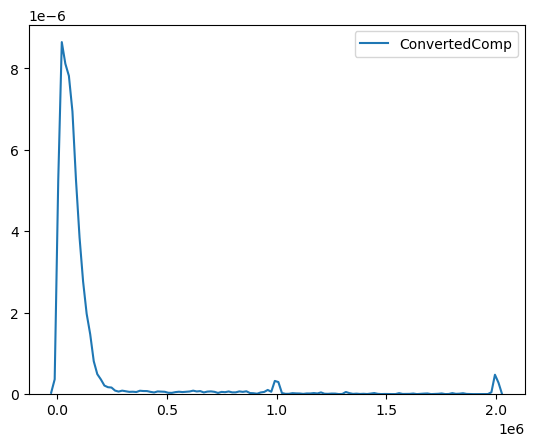

In [14]:

sns.kdeplot(df['ConvertedComp'])

plt.show()

Plot the histogram for the column `ConvertedComp`.


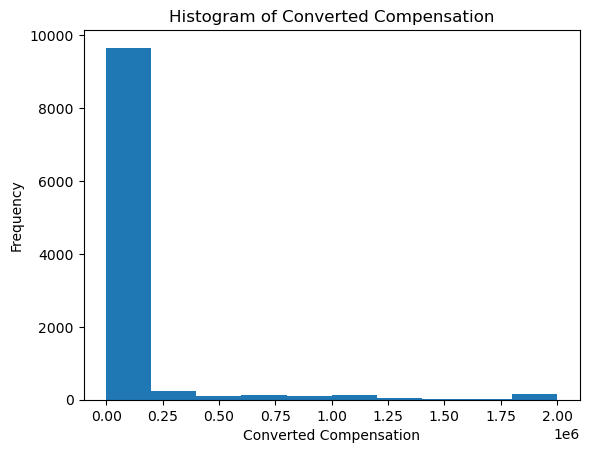

In [26]:
# your code goes here

df['ConvertedComp'].plot(kind='hist')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [27]:
# your code goes here
median_value = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_value)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [28]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identifying as Man:", man_count)

Number of responders identifying as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
woman_median_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp for responders identifying as Woman:", woman_median_comp)

Median ConvertedComp for responders identifying as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [30]:
# your code goes here
five_number_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])
print("Five-number summary for the Age column:")
print(five_number_summary_age[['min', '25%', '50%', '75%', 'max']])

Five-number summary for the Age column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


In [40]:
median_age = df['Age'].median()
print("Median Age of survey respondents:", median_age)

Median Age of survey respondents: 29.0


Plot a histogram of the column `Age`.


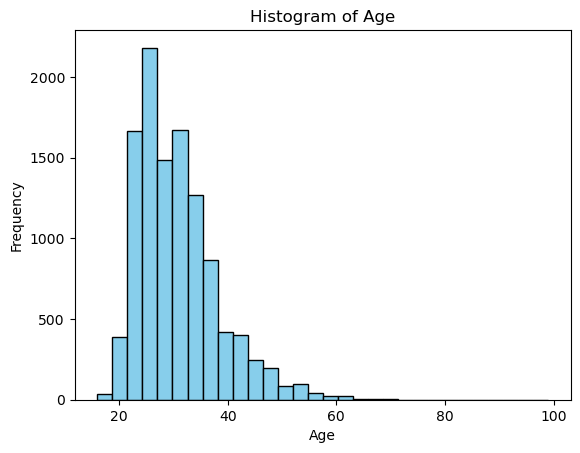

In [31]:
# your code goes here
df['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


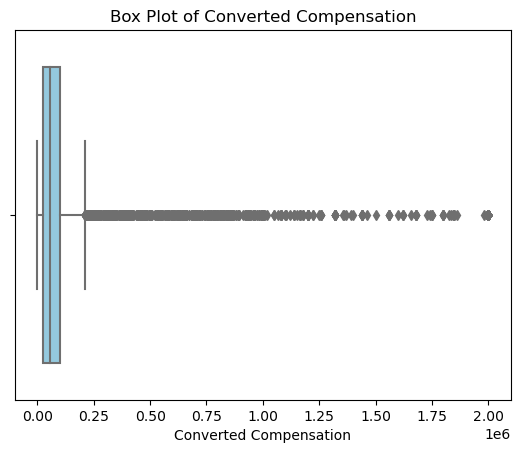

In [32]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'], color='skyblue')
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)

Lower Bound for Outliers: -82830.0
Upper Bound for Outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

num_outliers = outliers.shape[0]

print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


In [41]:
#median of ConvertedComp before removing the outliers
median_converted_comp = df['ConvertedComp'].median()
print("Median ConvertedComp before removing outliers:", median_converted_comp)

Median ConvertedComp before removing outliers: 57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# your code goes here
df['ConvertedComp'].quantile(0.5)

57745.0

In [37]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (11398, 85)
DataFrame shape after removing outliers: (9703, 85)


In [42]:
#median of ConvertedComp after remoivng the outliers

median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()
print("Median ConvertedComp after removing outliers:", median_converted_comp_no_outliers)

Median ConvertedComp after removing outliers: 52704.0


In [43]:
# mean of df without outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print("Mean ConvertedComp after removing outliers:", mean_converted_comp_no_outliers)

Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
# your code goes here
correlation_matrix = df.corr()['Age'].sort_values(ascending=False)
print("Correlation between Age and other numerical columns:")
print(correlation_matrix)



Correlation between Age and other numerical columns:
Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
